In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import missingno as msno
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['WA_Fn-UseC_-HR-Employee-Attrition.csv']


In [50]:
data=pd.read_csv('../input/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df=data.copy()

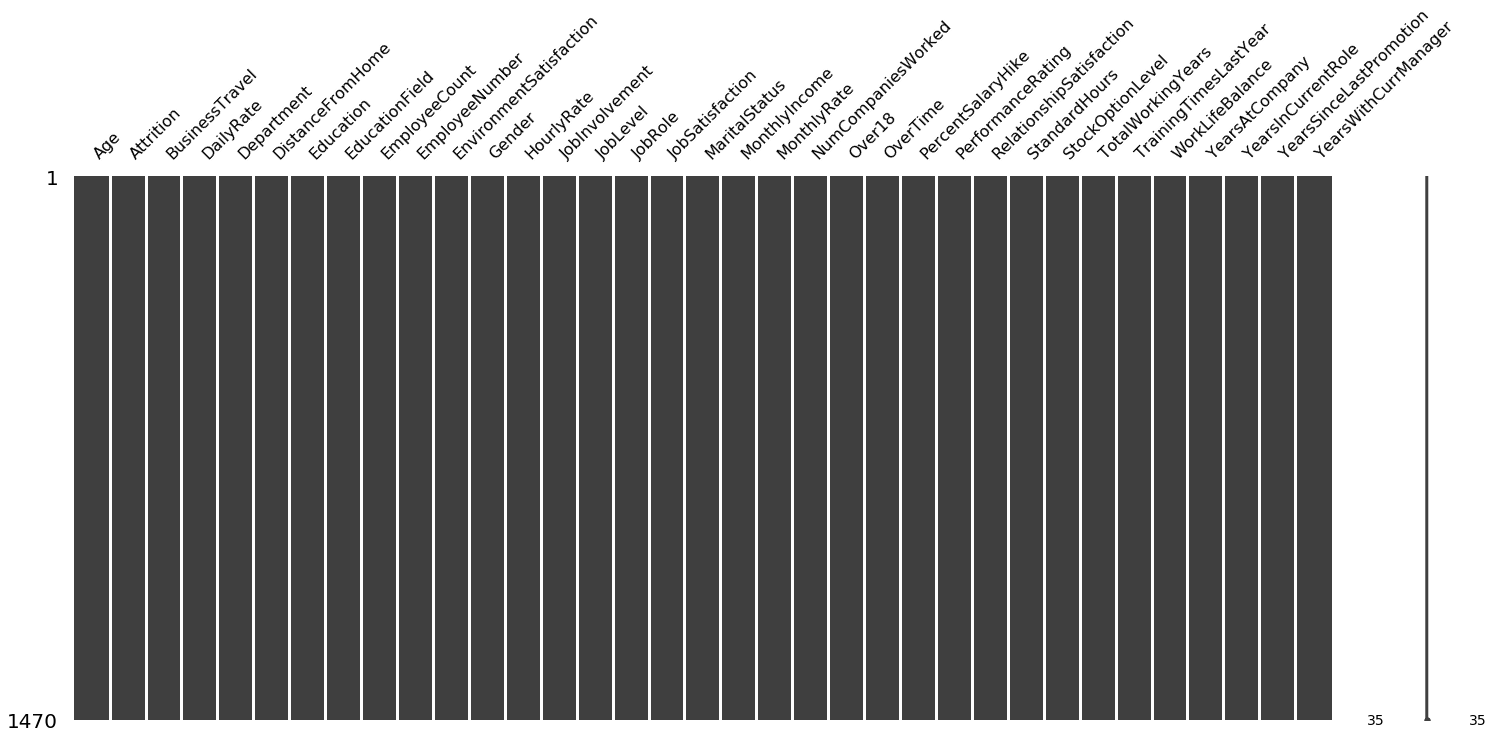

In [51]:
msno.matrix(df)

In [52]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


**Checking Count how many employee of Attrite**

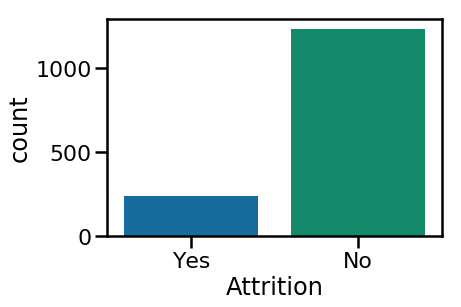

In [53]:
sns.countplot(df['Attrition'])
plt.show()

> lot shows that around 250 people have left the organization while the organization has been able to retain around 1200 people.

**Distributing Data with Respect to Important Factors**

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



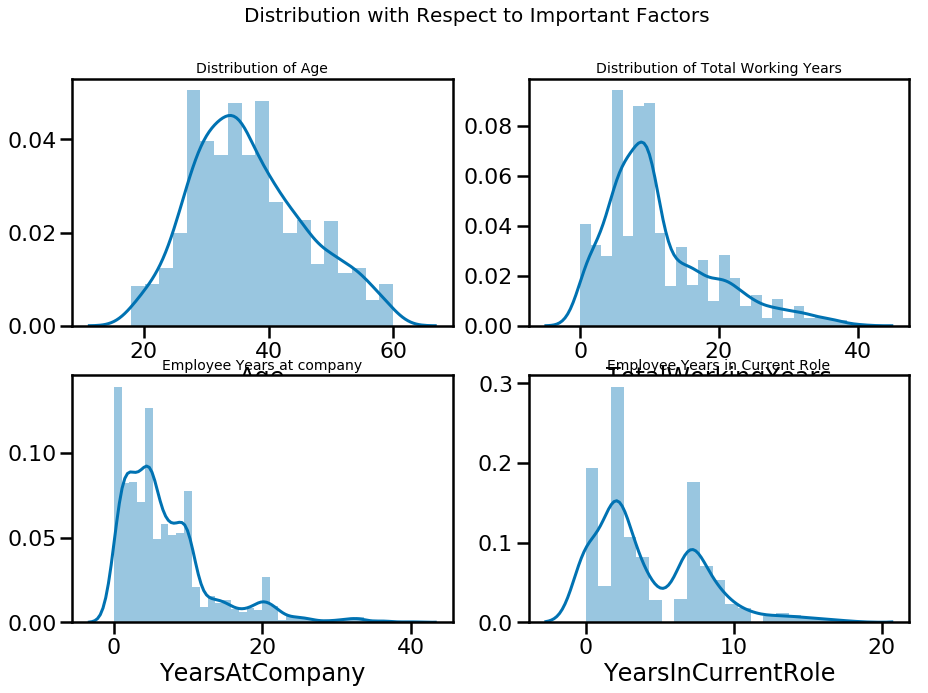

In [54]:
fig,ax = plt.subplots(2,2, figsize=(15,10))               # 'ax' has references to all the four axes
plt.suptitle("Distribution with Respect to Important Factors", fontsize=20)
sns.distplot(df['Age'], ax = ax[0,0])  # Plot on 1st axes
ax[0][0].set_title('Distribution of Age',fontsize=14)
sns.distplot(df['TotalWorkingYears'], ax = ax[0,1])  # Plot on IInd axes
ax[0][1].set_title('Distribution of Total Working Years',fontsize=14)
sns.distplot(df['YearsAtCompany'], ax = ax[1,0])  # Plot on IIIrd axes
ax[1][0].set_title('Employee Years at company',fontsize=14)
sns.distplot(df['YearsInCurrentRole'], ax = ax[1,1])  # Plot on IV the axes
ax[1][1].set_title('Employee Years in Current Role',fontsize=14)
plt.show()  

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



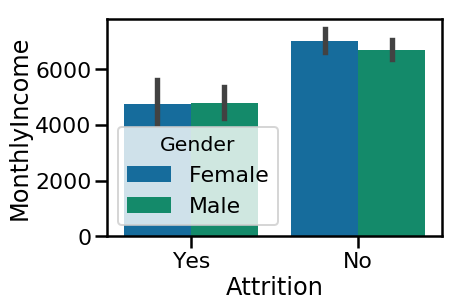

In [55]:
sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'Gender',data=df)
plt.show()

> people with less monthlyincome (around 3000 units) are likely to leave the organization than those with better income (around 5000 units).

**Gender Income Gap**

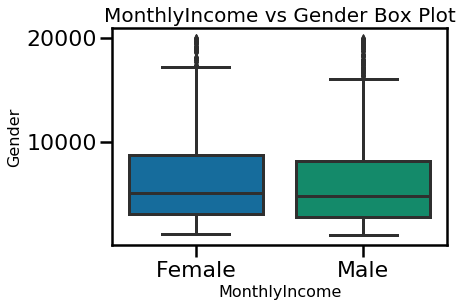

In [56]:
sns.boxplot(df['Gender'], df['MonthlyIncome'])
plt.title('MonthlyIncome vs Gender Box Plot', fontsize=20)      
plt.xlabel('MonthlyIncome', fontsize=16)
plt.ylabel('Gender', fontsize=16)
plt.show()

In [57]:
age=pd.DataFrame(data.groupby("Age")[["MonthlyIncome","Education","JobLevel","JobInvolvement","PerformanceRating","JobSatisfaction","EnvironmentSatisfaction","RelationshipSatisfaction","WorkLifeBalance","DailyRate","MonthlyRate"]].mean())
age["Count"]=data.Age.value_counts(dropna=False)
age.reset_index(level=0, inplace=True)
age.head()

,Age,MonthlyIncome,Education,JobLevel,JobInvolvement,PerformanceRating,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,DailyRate,MonthlyRate,Count
0,18,1518.375000,2.500000,1.000,2.875000,3.000000,3.250000,2.750000,3.125000,3.000000,747.625000,14476.000000,8
1,19,2075.000000,2.111111,1.000,2.444444,3.444444,2.555556,2.444444,2.888889,3.222222,548.444444,15119.666667,9
2,20,2539.363636,2.636364,1.000,2.636364,3.000000,2.636364,3.181818,2.363636,2.909091,819.454545,16480.909091,11
3,21,2491.461538,1.615385,1.000,2.692308,3.153846,2.692308,2.692308,2.692308,2.769231,762.846154,17268.923077,13
4,22,2950.000000,1.812500,1.125,2.750000,3.250000,2.937500,2.812500,2.250000,2.750000,806.937500,14424.125000,16


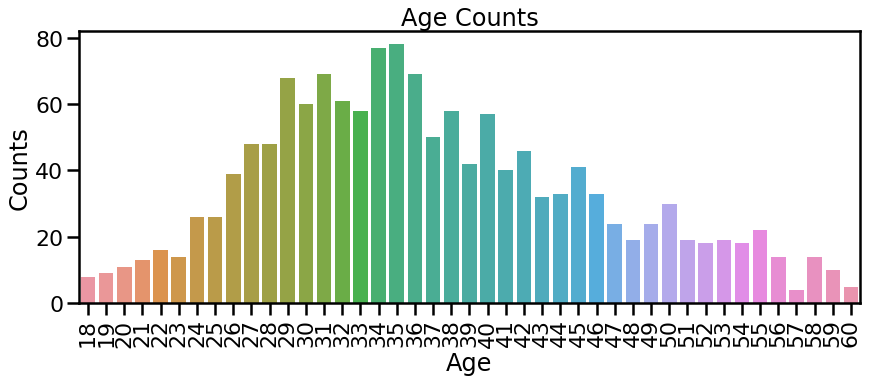

In [58]:
plt.figure(figsize=(14,5))
ax=sns.barplot(x=age.Age,y=age.Count, data=df)
plt.xticks(rotation=90)
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Age Counts")
plt.show()

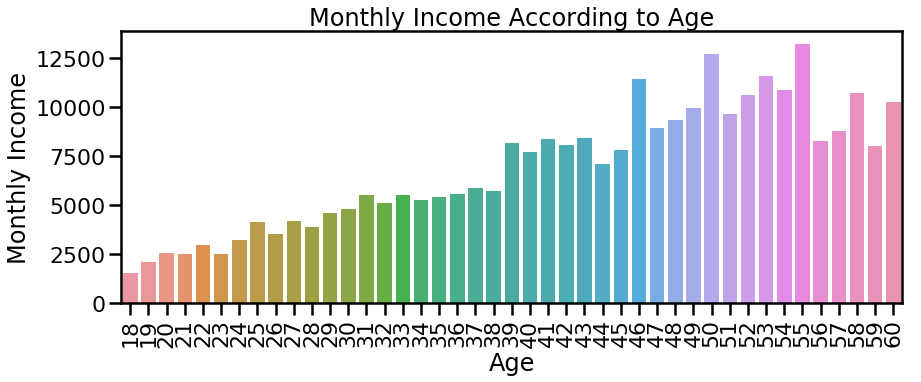

In [59]:
plt.figure(figsize=(14,5))
ax=sns.barplot(x=age.Age,y=age.MonthlyIncome)
#palette = sns.cubehelix_palette(len(age.index))
plt.xticks(rotation=90)
plt.xlabel("Age")
plt.ylabel("Monthly Income")
plt.title("Monthly Income According to Age")
plt.show()

**Plotting Role with respect to their Incomes**

In [60]:
income=pd.DataFrame(data.groupby("JobRole").MonthlyIncome.mean().sort_values(ascending=False))

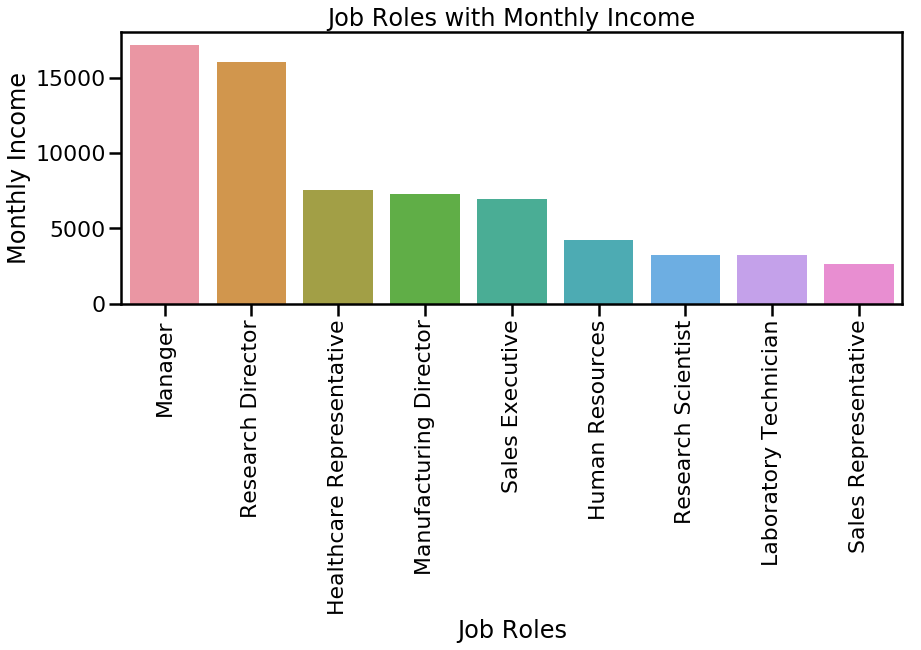

In [61]:
plt.figure(figsize=(14,5))
ax=sns.barplot(x=income.index,y=income.MonthlyIncome)
plt.xticks(rotation=90)
plt.xlabel("Job Roles")
plt.ylabel("Monthly Income")
plt.title("Job Roles with Monthly Income")
plt.show()


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



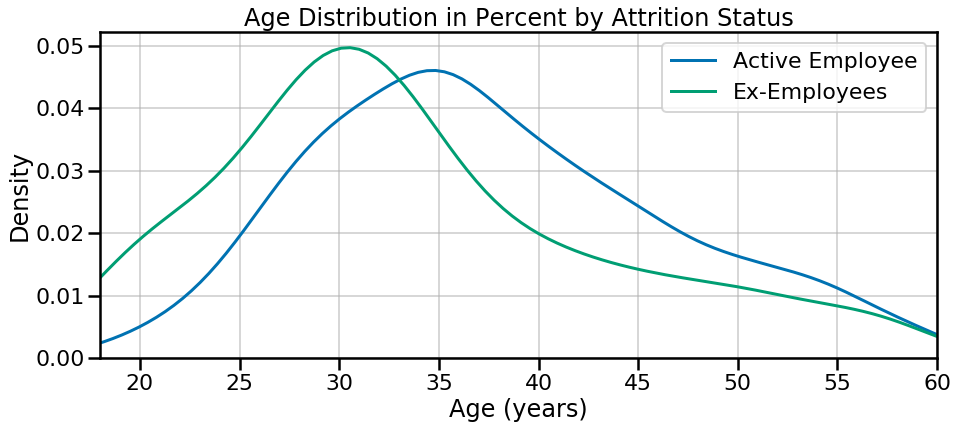

In [62]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'Age'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'Age'], label = 'Ex-Employees')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Age Distribution in Percent by Attrition Status');

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



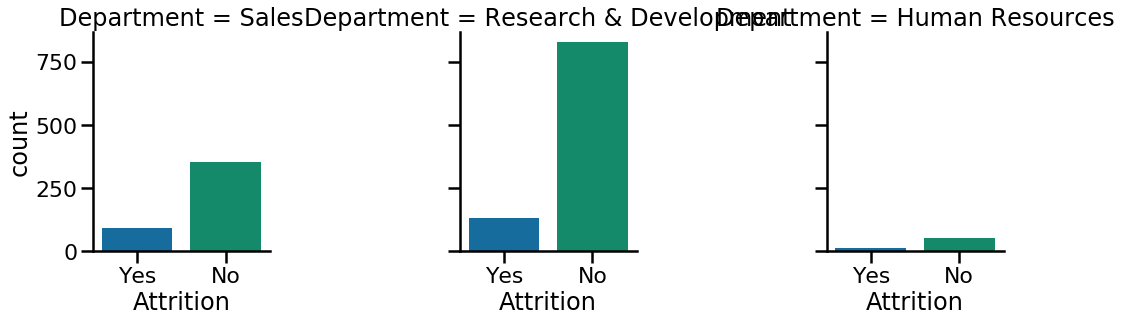

In [63]:
sns.factorplot(data=df,kind='count',x='Attrition',col='Department')

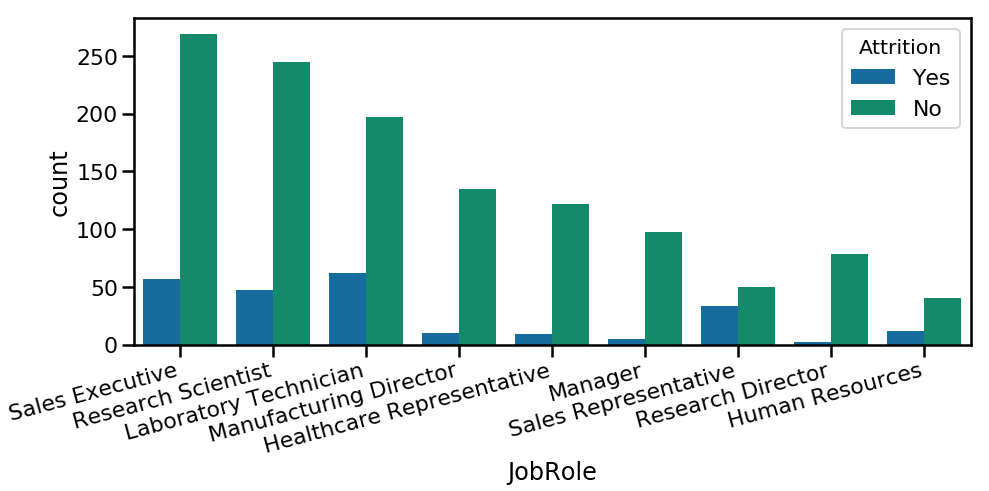

In [64]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='JobRole',hue='Attrition', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha="right" )
plt.show()

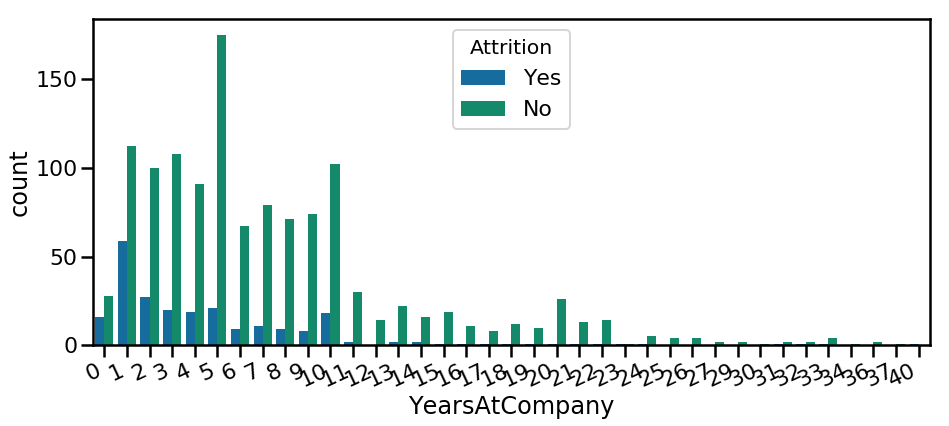

In [65]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='YearsAtCompany',hue='Attrition', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right" )
plt.show()

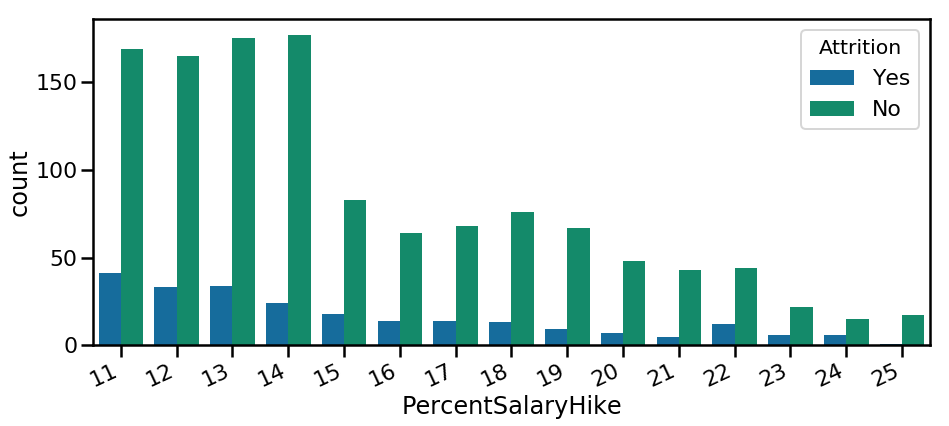

In [66]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='PercentSalaryHike',hue='Attrition', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right" )
plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



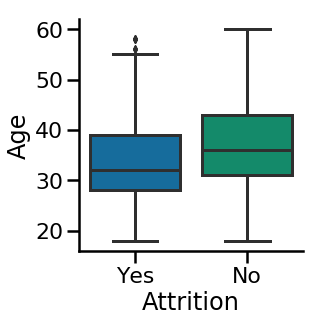

In [67]:
sns.factorplot(data=df,y='Age',x='Attrition',size=5,aspect=1,kind='box')

In [68]:
pd.crosstab(columns=[df.Attrition],index=[df.JobSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290
All,0.838776,0.161224


In [69]:
pd.crosstab(columns=[df.Attrition],index=[df.EnvironmentSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


In [70]:
pd.crosstab(columns=[df.Attrition],index=[df.JobInvolvement],margins=True,normalize='index') 

Attrition,No,Yes
JobInvolvement,,
1,0.662651,0.337349
2,0.810667,0.189333
3,0.855991,0.144009
4,0.909722,0.090278
All,0.838776,0.161224


In [71]:
pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index')

Attrition,No,Yes
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


In [72]:
pd.crosstab(columns=[df.Attrition],index=[df.RelationshipSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


In [73]:
df1=df.copy()

In [74]:
dect_gender={'Male':0,'Female':1}
df1['Gender']=df1['Gender'].map(dect_gender)

In [75]:
dect_attrition={'Yes':0,'No':1}
df1['Attrition']=df1['Attrition'].map(dect_attrition)

In [76]:
df1.drop(['BusinessTravel','DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate'
         ,'NumCompaniesWorked','Over18','StandardHours', 'StockOptionLevel','TrainingTimesLastYear',
       'Department','EducationField','OverTime','JobRole','MaritalStatus'],axis=1,inplace=True)

In [77]:
X = df1.drop('Attrition',axis = 1)
Y = df1['Attrition']

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3,random_state=25)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(1029, 18) (1029,)
(441, 18) (441,)


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve, precision_score, accuracy_score
from sklearn.metrics import recall_score, classification_report, f1_score, roc_curve, auc

**Decision Tree Classifiers**

In [81]:
clf_dt = DecisionTreeClassifier(max_depth=3,random_state=38)

In [82]:
clf_dt.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=38,
            splitter='best')

In [83]:
dt_pred = clf_dt.predict(xtest)
dt_pred_prb=clf_dt.predict_proba(xtest)[:,1]

In [84]:
accuracy_dt = accuracy_score(ytest,dt_pred)
print("Accuracy: {}".format(accuracy_dt))

Accuracy: 0.8480725623582767


In [85]:
print(classification_report(ytest,dt_pred))

              precision    recall  f1-score   support

           0       0.64      0.10      0.17        70
           1       0.85      0.99      0.92       371

   micro avg       0.85      0.85      0.85       441
   macro avg       0.74      0.54      0.54       441
weighted avg       0.82      0.85      0.80       441



In [86]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

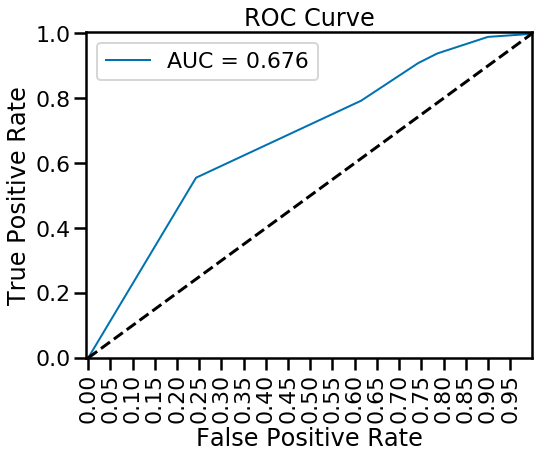

In [87]:
sns.set_context('poster')
auc_dt=roc_auc_score(ytest,dt_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,dt_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_dt)

In [88]:
clf_dt.feature_importances_

array([0.10545393, 0.13315956, 0.        , 0.05051929, 0.        ,
       0.        , 0.11274701, 0.        , 0.04746476, 0.        ,
       0.        , 0.        , 0.47783906, 0.        , 0.        ,
       0.        , 0.        , 0.0728164 ])

In [89]:
features_tuple=list(zip(X.columns,clf_dt.feature_importances_))

In [90]:
features_tuple

[('Age', 0.10545392515007293),
 ('DistanceFromHome', 0.13315955600262078),
 ('Education', 0.0),
 ('EnvironmentSatisfaction', 0.050519286451902456),
 ('Gender', 0.0),
 ('JobInvolvement', 0.0),
 ('JobLevel', 0.11274700672350775),
 ('JobSatisfaction', 0.0),
 ('MonthlyIncome', 0.047464760415840405),
 ('PercentSalaryHike', 0.0),
 ('PerformanceRating', 0.0),
 ('RelationshipSatisfaction', 0.0),
 ('TotalWorkingYears', 0.47783906498044587),
 ('WorkLifeBalance', 0.0),
 ('YearsAtCompany', 0.0),
 ('YearsInCurrentRole', 0.0),
 ('YearsSinceLastPromotion', 0.0),
 ('YearsWithCurrManager', 0.07281640027560977)]

In [91]:
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])

In [92]:
feature_imp=feature_imp.sort_values("Importance",ascending=False)

Text(0.5, 1.0, 'Decision Classifier - Features Importance')

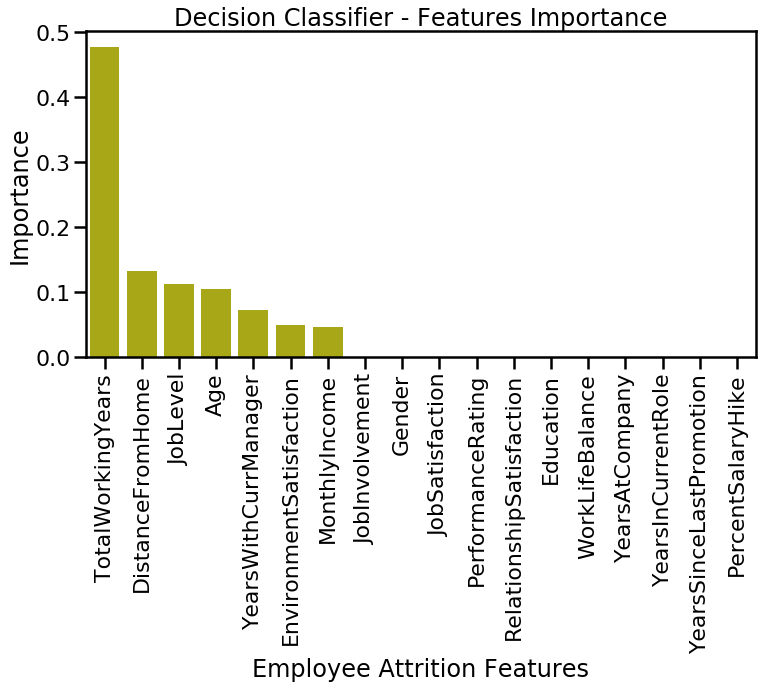

In [93]:
plt.figure(figsize=(12,6))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='y')
plt.xlabel("Employee Attrition Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Decision Classifier - Features Importance")